In [342]:
# блок импорта библиотек

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import shutil
from pathlib import Path

import seaborn as sns 
from sklearn import preprocessing
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

import math 
from sklearn import metrics

# импорт для обучения SVM
from sklearn.svm import SVC

# импорт для KNN
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler

# линейная регрессия
from sklearn.linear_model import LogisticRegression

# Гаусс
from sklearn.naive_bayes import GaussianNB

# Дерево принятия решения
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [235]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/heart-attack-prediction-dataset")
new_file = os.path.join(path, os.listdir(path)[0])

In [236]:
# перенесём файл в локальное рабочее пространство
data_path = os.path.join(str(Path.home()), 'PycharmProjects/ML/src/data/heart-attack')
shutil.copy(new_file, data_path)
train_path = os.path.join(data_path, os.listdir(data_path)[0])


In [237]:
# для случая работы с облаком берём файл напрямую
# df = pd.read_csv(new_file)

In [238]:
# загружаем файл
df = pd.read_csv(train_path)
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [239]:
df.shape

(8763, 26)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [241]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [242]:
# разделим столбец давление на систолическое и диастолическое
split_cols = df['Blood Pressure'].str.split('/', expand=True)
split_cols.columns = ['Systolic', 'Diastolic']

# добавим новые столбцы в источник данных
for i in range(len(split_cols.columns)):
    if split_cols.columns[i] not in df:
        df.insert(df.columns.get_loc('Blood Pressure')+1+i, split_cols.columns[i], split_cols[split_cols.columns[i]])
    else:
        df.insert(df.columns.get_loc('Blood Pressure')+1+i, split_cols.columns[i], df.pop(split_cols.columns[i]))
    df[split_cols.columns[i]] = df[split_cols.columns[i]].astype('int64')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Systolic,Diastolic,Heart Rate,Diabetes,Family History,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,158,88,72,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,165,93,98,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,174,99,72,1,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,163,100,73,1,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,91,88,93,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [243]:
# добавим соотношение показателей давления
BP_Ratio = df['Systolic']/df['Diastolic']
df.insert(max(df.columns.get_loc('Systolic'), df.columns.get_loc('Diastolic')) +1, 'BP_Ratio', BP_Ratio)
df['BP_Ratio'] = df['BP_Ratio'].astype('float64')

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Systolic                         8763 non-null   int64  
 6   Diastolic                        8763 non-null   int64  
 7   BP_Ratio                         8763 non-null   float64
 8   Heart Rate                       8763 non-null   int64  
 9   Diabetes                         8763 non-null   int64  
 10  Family History                   8763 non-null   int64  
 11  Smoking                          8763 non-null   int64  
 12  Obesity             

In [245]:
# удаляем лишние столбцы, не влияющие на исследование
df.drop(['Blood Pressure'], axis = 1, inplace = True)
df.drop(['Patient ID'], axis = 1, inplace = True)
df.drop_duplicates()

,Age,Sex,Cholesterol,Systolic,Diastolic,BP_Ratio,Heart Rate,Diabetes,Family History,Smoking,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158,88,1.795455,72,0,0,1,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165,93,1.774194,98,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174,99,1.757576,72,1,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163,100,1.630000,73,1,1,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91,88,1.034091,93,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94,76,1.236842,61,1,1,1,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,28,Female,120,157,102,1.539216,73,1,0,0,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,47,Male,250,161,75,2.146667,105,0,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,36,Male,178,119,67,1.776119,60,1,0,1,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [246]:
df.head()

,Age,Sex,Cholesterol,Systolic,Diastolic,BP_Ratio,Heart Rate,Diabetes,Family History,Smoking,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158,88,1.795455,72,0,0,1,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165,93,1.774194,98,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174,99,1.757576,72,1,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163,100,1.630000,73,1,1,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91,88,1.034091,93,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [247]:
# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == 'object': # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки
encoded_data.head(10)

,Age,Sex,Cholesterol,Systolic,Diastolic,BP_Ratio,Heart Rate,Diabetes,Family History,Smoking,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,1,208,158,88,1.795455,72,0,0,1,...,6.615001,261404,31.251233,286,0,6,0,5,1,0
1,21,1,389,165,93,1.774194,98,1,1,1,...,4.963459,285768,27.194973,235,1,7,3,4,0,0
2,21,0,324,174,99,1.757576,72,1,0,0,...,9.463426,235282,28.176571,587,4,4,6,3,0,0
3,84,1,383,163,100,1.630000,73,1,1,1,...,7.648981,125640,36.464704,378,3,4,3,4,0,0
4,66,1,318,91,88,1.034091,93,1,1,1,...,1.514821,160555,21.809144,231,1,5,16,1,0,0
5,54,0,297,172,86,2.000000,48,1,1,1,...,7.798752,241339,20.146840,795,5,10,7,3,0,1
6,90,1,358,102,73,1.397260,84,0,0,1,...,0.627356,190450,28.885811,284,4,10,3,4,0,1
7,84,1,220,131,68,1.926471,107,0,0,1,...,10.543780,122093,22.221862,370,6,7,10,1,0,1
8,20,1,145,144,105,1.371429,68,1,0,1,...,11.348787,25086,35.809901,790,7,4,2,5,1,0
9,43,0,248,160,70,2.285714,55,0,1,1,...,4.055115,209703,22.558917,232,7,7,10,1,0,0


In [248]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Systolic                         8763 non-null   int64  
 4   Diastolic                        8763 non-null   int64  
 5   BP_Ratio                         8763 non-null   float64
 6   Heart Rate                       8763 non-null   int64  
 7   Diabetes                         8763 non-null   int64  
 8   Family History                   8763 non-null   int64  
 9   Smoking                          8763 non-null   int64  
 10  Obesity                          8763 non-null   int64  
 11  Alcohol Consumption              8763 non-null   int64  
 12  Exercise Hours Per W

In [249]:
# проверим на дубликаты
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


In [250]:
null_v = df.isna().sum()
null_v.sum()

np.int64(0)

In [251]:
# Первый анализ данных

In [252]:
print(df['Sex'].value_counts())

print(f"\n{df['Smoking'].value_counts()}")

print(f"\n{df['Heart Attack Risk'].value_counts()}")

Sex
Male      6111
Female    2652
Name: count, dtype: int64

Smoking
1    7859
0     904
Name: count, dtype: int64

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64


In [253]:
df.groupby('BP_Ratio').count()['Age']

BP_Ratio
0.818182    3
0.825688    1
0.833333    3
0.834862    1
0.836364    2
           ..
2.950000    1
2.950820    1
2.966667    2
2.983333    1
3.000000    2
Name: Age, Length: 3417, dtype: int64

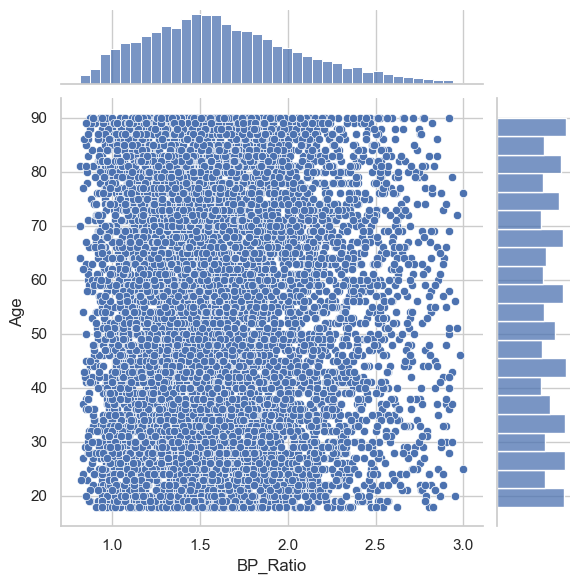

In [254]:
sns.jointplot(x = 'BP_Ratio', y='Age', data=df, kind='scatter')

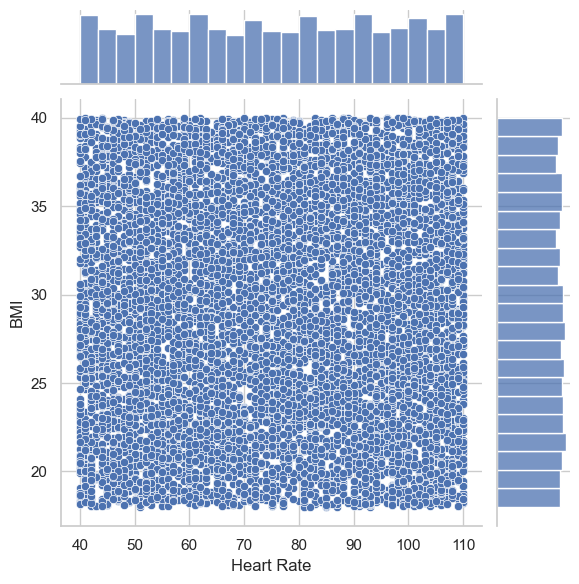

In [255]:
sns.jointplot(x = 'Heart Rate', y='BMI', data=df, kind='scatter')

In [256]:
#sns_plot = sns.pairplot(encoded_data)

In [257]:
encoded_data.head(20)

,Age,Sex,Cholesterol,Systolic,Diastolic,BP_Ratio,Heart Rate,Diabetes,Family History,Smoking,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,1,208,158,88,1.795455,72,0,0,1,...,6.615001,261404,31.251233,286,0,6,0,5,1,0
1,21,1,389,165,93,1.774194,98,1,1,1,...,4.963459,285768,27.194973,235,1,7,3,4,0,0
2,21,0,324,174,99,1.757576,72,1,0,0,...,9.463426,235282,28.176571,587,4,4,6,3,0,0
3,84,1,383,163,100,1.630000,73,1,1,1,...,7.648981,125640,36.464704,378,3,4,3,4,0,0
4,66,1,318,91,88,1.034091,93,1,1,1,...,1.514821,160555,21.809144,231,1,5,16,1,0,0
5,54,0,297,172,86,2.000000,48,1,1,1,...,7.798752,241339,20.146840,795,5,10,7,3,0,1
6,90,1,358,102,73,1.397260,84,0,0,1,...,0.627356,190450,28.885811,284,4,10,3,4,0,1
7,84,1,220,131,68,1.926471,107,0,0,1,...,10.543780,122093,22.221862,370,6,7,10,1,0,1
8,20,1,145,144,105,1.371429,68,1,0,1,...,11.348787,25086,35.809901,790,7,4,2,5,1,0
9,43,0,248,160,70,2.285714,55,0,1,1,...,4.055115,209703,22.558917,232,7,7,10,1,0,0


In [258]:
# посмотрим зависимость давления, уровня холестерина и употребления алкоголя для людей в зависимости от пола и возраста
table = encoded_data.pivot_table(index=['Age'], columns='Sex', values=['BP_Ratio', 'Cholesterol', 'Alcohol Consumption'], aggfunc={"BP_Ratio":['mean'], "Cholesterol":['mean'], 'Alcohol Consumption':'sum'})
table.sort_values(by='Age', ascending=False)
table

Alcohol Consumption      BP_Ratio           Cholesterol            
                    sum          mean                  mean            
Sex                   0   1         0         1           0           1
Age                                                                    
18                   21  51  1.613280  1.666154  244.000000  257.888889
19                   27  52  1.612255  1.588840  239.422222  262.710843
20                   23  53  1.539045  1.593927  227.586957  260.333333
21                   23  49  1.719541  1.641008  264.729730  257.175000
22                   15  56  1.685591  1.661332  258.241379  275.189474
..                  ...  ..       ...       ...         ...         ...
86                   12  44  1.704416  1.534070  239.920000  260.212500
87                   18  49  1.658145  1.618731  288.756757  263.033708
88                   20  52  1.720009  1.631149  267.970588  256.078652
89                   17  51  1.629362  1.571374  246.800000  242.080460
90                   23  63  1.626103  1.674618  264.804878  251.243243

[73 rows x 6 columns]

In [259]:
# посмотрим зависимость давления, уровня холестерина и употребления алкоголя для людей в зависимости от пола и возраста
table = encoded_data.pivot_table(index=['Age'], columns='Physical Activity Days Per Week', values=['BP_Ratio'], aggfunc={"BP_Ratio":['mean']})
table.sort_values(by='Age', ascending=False)
table

BP_Ratio                                \
                                     mean                                 
Physical Activity Days Per Week         0         1         2         3   
Age                                                                       
18                               1.719511  1.699846  1.650706  1.678371   
19                               1.658593  1.579542  1.587527  1.638530   
20                               1.647232  1.638617  1.500749  1.479319   
21                               1.575989  1.757635  1.796624  1.645193   
22                               1.654469  1.647744  1.739590  1.658968   
..                                    ...       ...       ...       ...   
86                               1.694987  1.639493  1.512542  1.643669   
87                               1.669730  1.704943  1.617546  1.544227   
88                               1.733045  1.599190  1.693779  1.703152   
89                               1.541614  1.610882  1.522379  1.537599   
90                               1.729071  1.703685  1.763069  1.611112   

                                                                         
                                                                         
Physical Activity Days Per Week         4         5         6         7  
Age                                                                      
18                               1.746423  1.582522  1.475540  1.657716  
19                               1.774907  1.512747  1.490483  1.587510  
20                               1.825089  1.464081  1.439619  1.555233  
21                               1.989253  1.378820  1.837025  1.493973  
22                               1.802083  1.619686  1.678000  1.575446  
..                                    ...       ...       ...       ...  
86                               1.443712  1.552120  1.585016  1.415393  
87                               1.574266  1.625348  1.673917  1.663012  
88                               1.635970  1.562456  1.664639  1.669981  
89                               1.682227  1.552643  1.703634  1.454040  
90                               1.593125  1.508611  1.771666  1.633245  

[73 rows x 8 columns]

In [260]:
encoded_data['BP_Ratio'].value_counts()

BP_Ratio
2.000000    69
1.500000    51
1.000000    40
1.666667    38
1.333333    29
            ..
1.635417     1
1.519608     1
1.135417     1
1.152941     1
1.776119     1
Name: count, Length: 3417, dtype: int64

<Axes: xlabel='None-None-Physical Activity Days Per Week', ylabel='Age'>

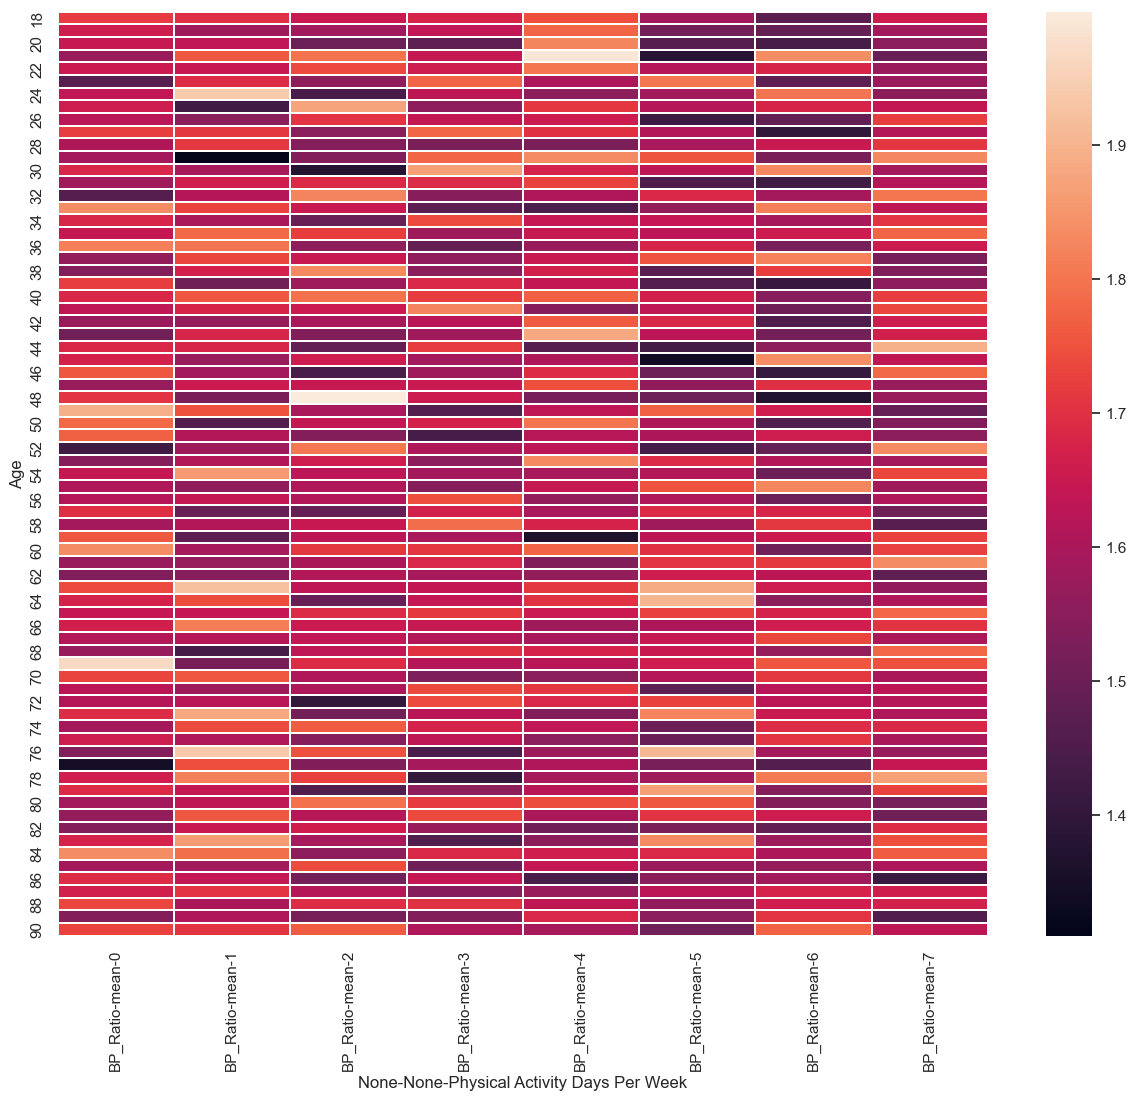

In [261]:
figure(figsize=(15, 12))
sns.heatmap(table, annot=False, fmt=".0f", linewidths=.2)

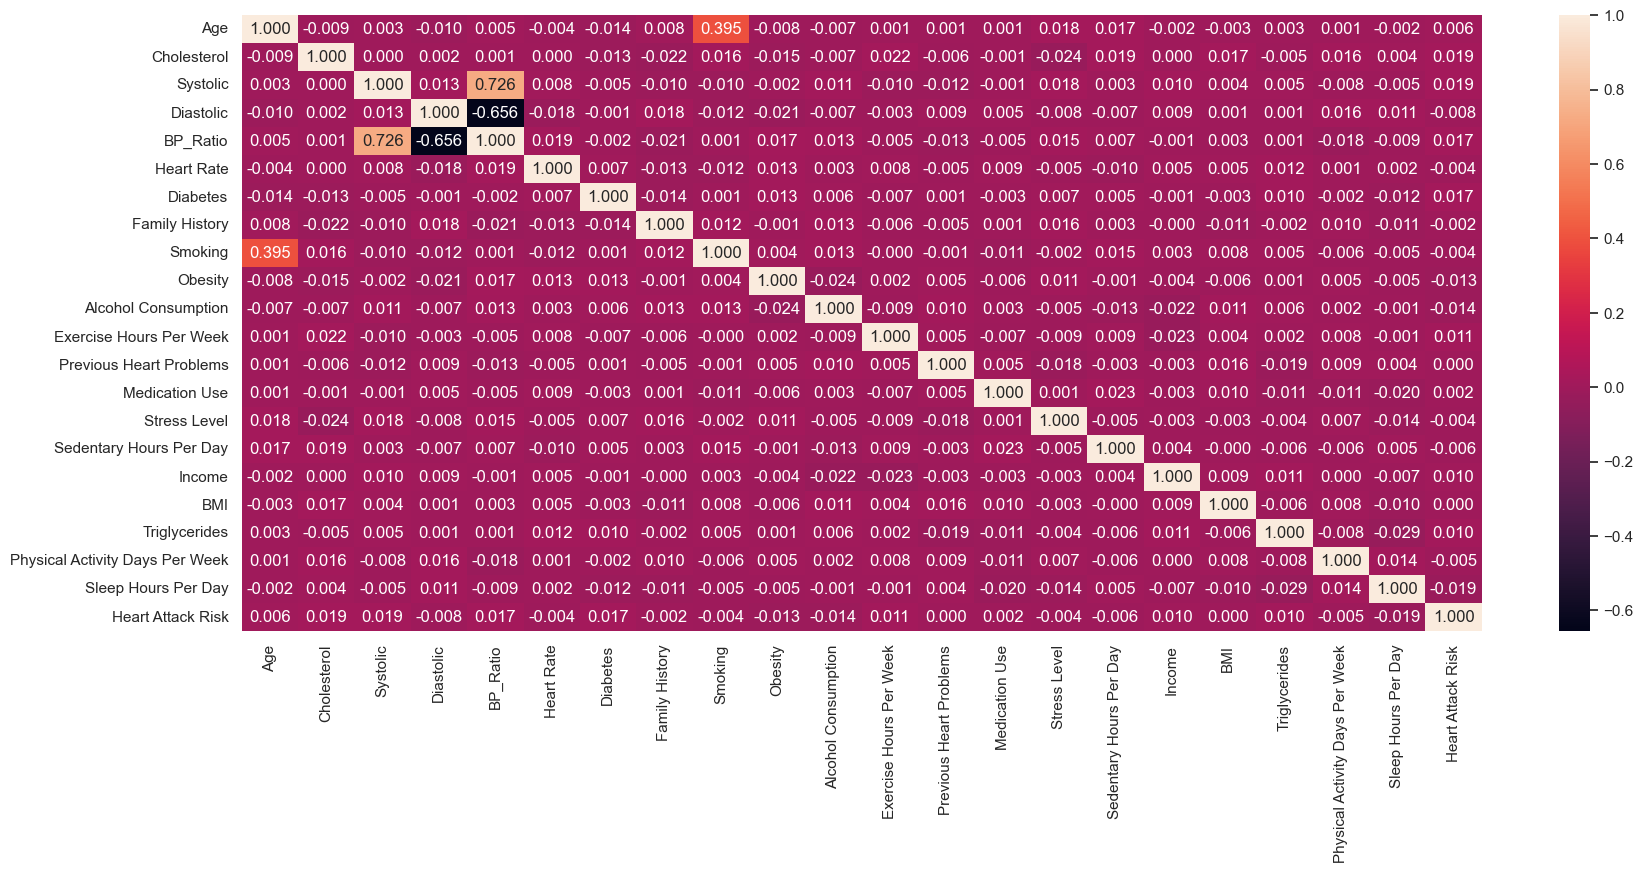

In [262]:
columns = df.select_dtypes(include = ['int', 'float'])
plt.figure(figsize = (20,8))
sns.heatmap(columns.corr(), annot=True, fmt='.3f')
plt.show()

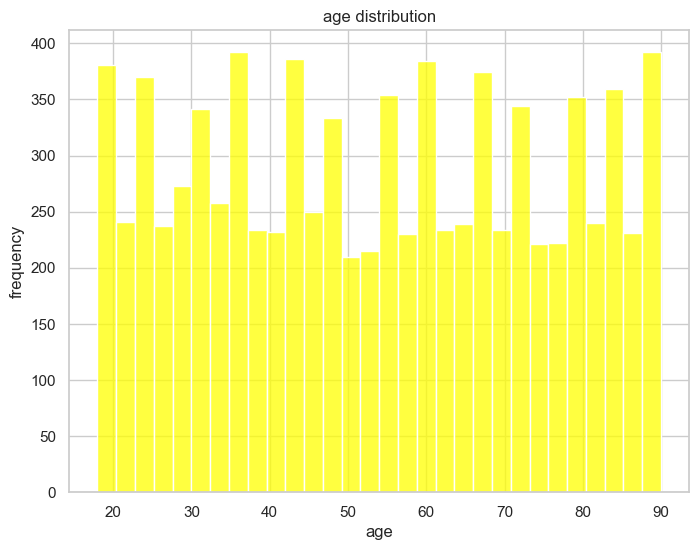

In [263]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=False, bins=30, color='yellow')
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

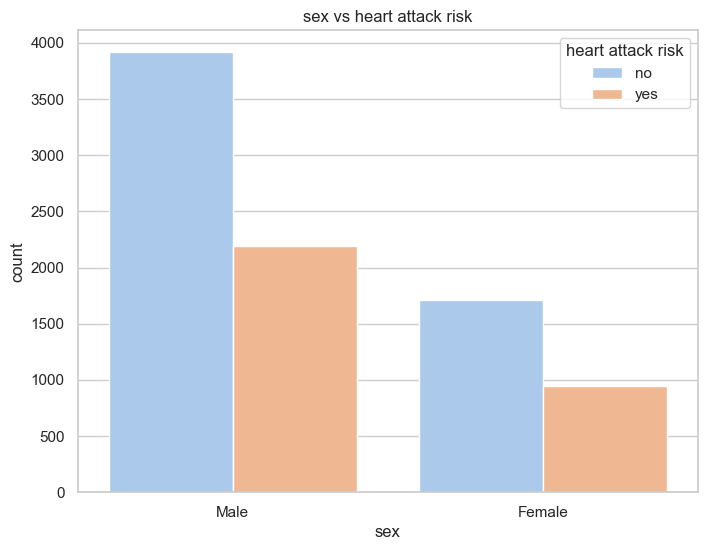

In [264]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Heart Attack Risk', palette='pastel')
plt.title('sex vs heart attack risk')
plt.xlabel('sex')
plt.ylabel('count')
plt.legend(title='heart attack risk', labels=['no', 'yes'])
plt.show()

In [265]:
risk_by_sex = df.groupby(['Sex', 'Heart Attack Risk']).size().unstack(fill_value=0)
male_percentages = risk_by_sex.loc['Male'] / risk_by_sex.loc['Male'].sum() * 100
female_percentages = risk_by_sex.loc['Female'] / risk_by_sex.loc['Female'].sum() * 100

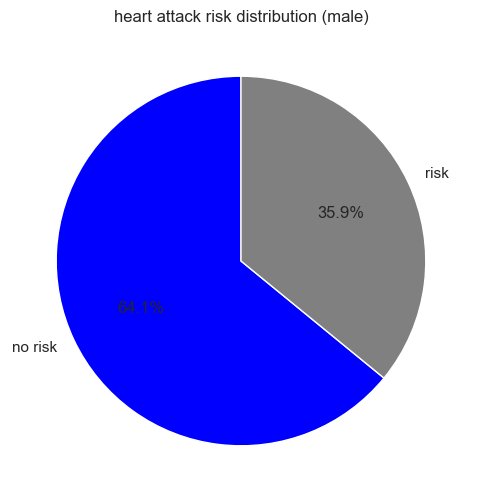

In [266]:
plt.figure(figsize=(6, 6))
plt.pie(male_percentages, labels=['no risk', 'risk'], autopct='%1.1f%%', startangle=90, colors=['blue', 'grey'])
plt.title('heart attack risk distribution (male)')
plt.show()

Text(0.5, 1.0, 'Pie Chart for Heart Attack Classification')

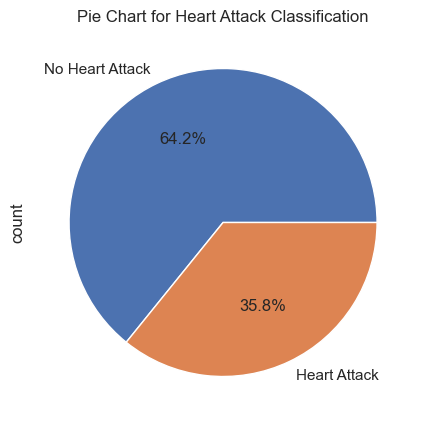

In [267]:
plt.figure(figsize=(5,5))
labels = ['No Heart Attack', 'Heart Attack']
df['Heart Attack Risk'].value_counts().plot(kind='pie',labels=labels,autopct='%1.1f%%')
plt.title('Pie Chart for Heart Attack Classification')

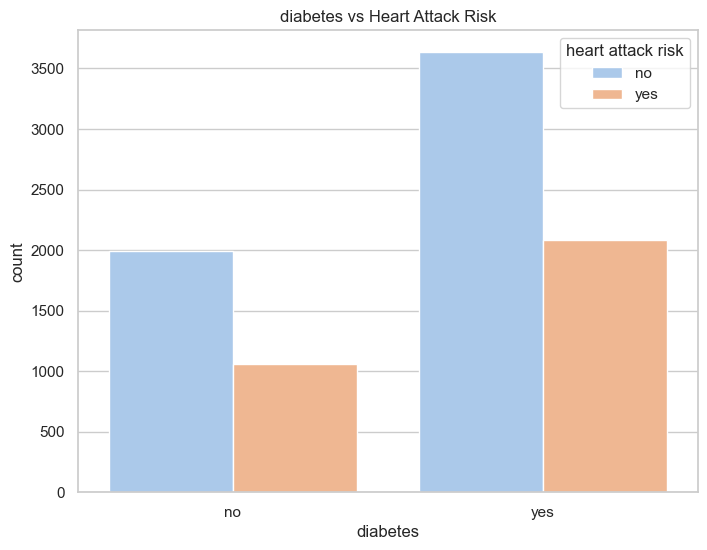

In [268]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Diabetes', hue='Heart Attack Risk', palette='pastel')
plt.title('diabetes vs Heart Attack Risk')
plt.xlabel('diabetes')
plt.ylabel('count')
plt.xticks([0, 1], ['no', 'yes'])  # change 0/1 to no/yes for better readability
plt.legend(title='heart attack risk', labels=['no', 'yes'])
plt.show()

Text(0, 0.5, 'Number of Patients')

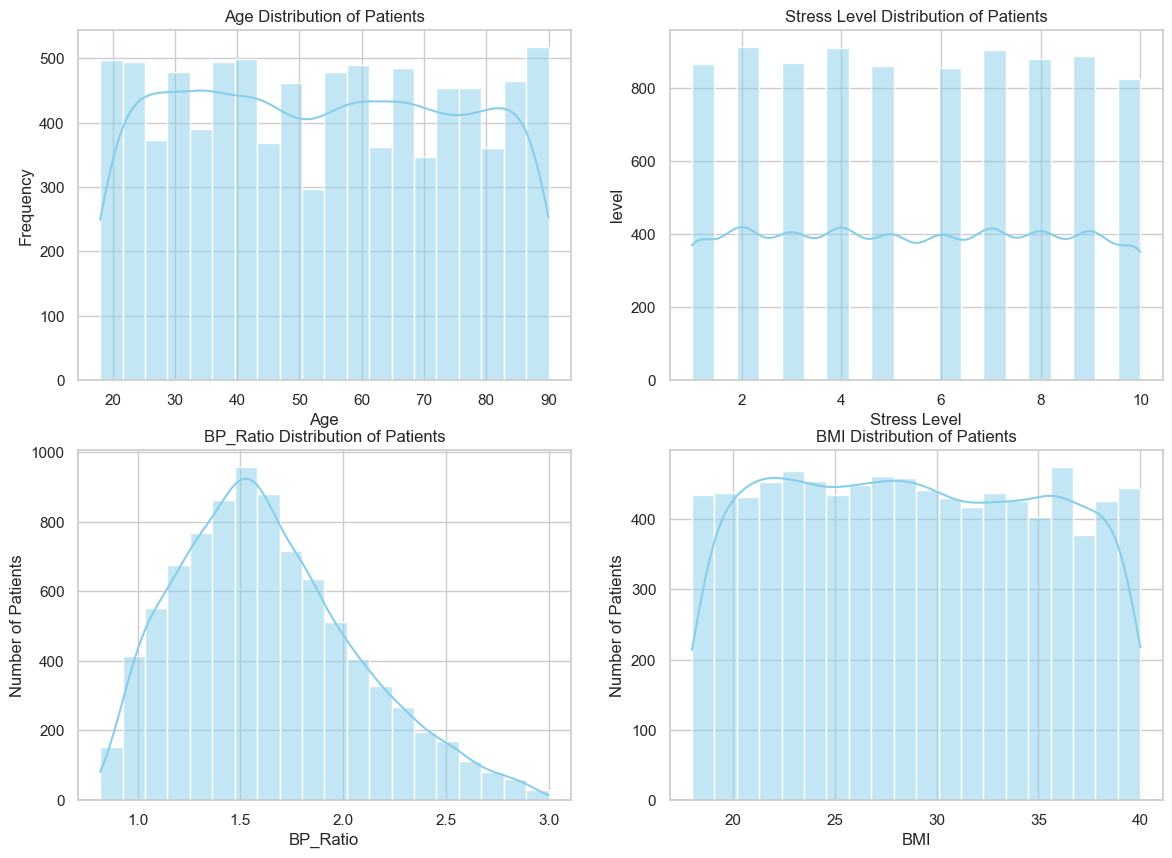

In [269]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(encoded_data['Age'], kde=True, color='skyblue', bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution of Patients')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(encoded_data['BP_Ratio'], kde=True, color='skyblue', bins=20, ax=axes[1, 0])
axes[1, 0].set_title('BP_Ratio Distribution of Patients')
axes[1, 0].set_xlabel('BP_Ratio')
axes[1, 0].set_ylabel('Number of Patients')

sns.histplot(encoded_data['Stress Level'], kde=True, color='skyblue', bins=20, ax=axes[0, 1])
axes[0, 1].set_title('Stress Level Distribution of Patients')
axes[0, 1].set_xlabel('Stress Level')
axes[0, 1].set_ylabel('level')

sns.histplot(encoded_data['BMI'], kde=True, color='skyblue', bins=20, ax=axes[1, 1])
axes[1, 1].set_title('BMI Distribution of Patients')
axes[1, 1].set_xlabel('BMI')
axes[1, 1].set_ylabel('Number of Patients')

Text(0.5, 1.0, 'Continent')

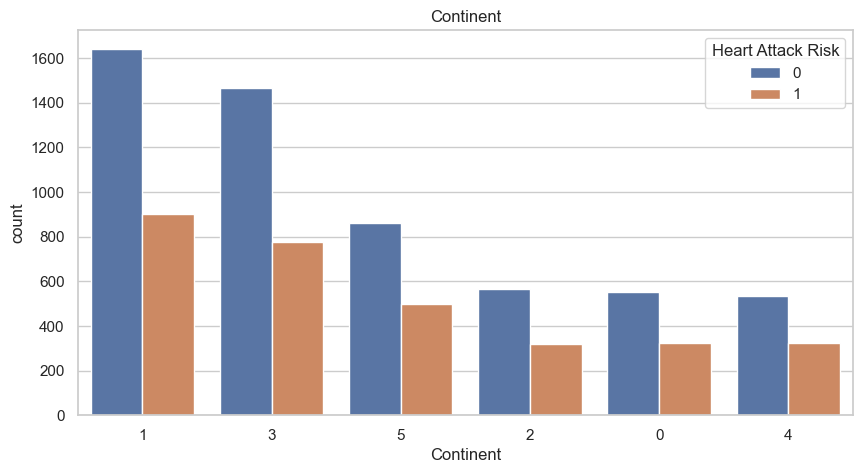

In [270]:
plt.figure(figsize=(10,5))
order1 = encoded_data['Continent'].value_counts().index
sns.countplot(data=encoded_data, x='Continent',hue='Heart Attack Risk', order=order1)
plt.title('Continent',fontsize=12)

Text(0.5, 0, 'Stress Level')

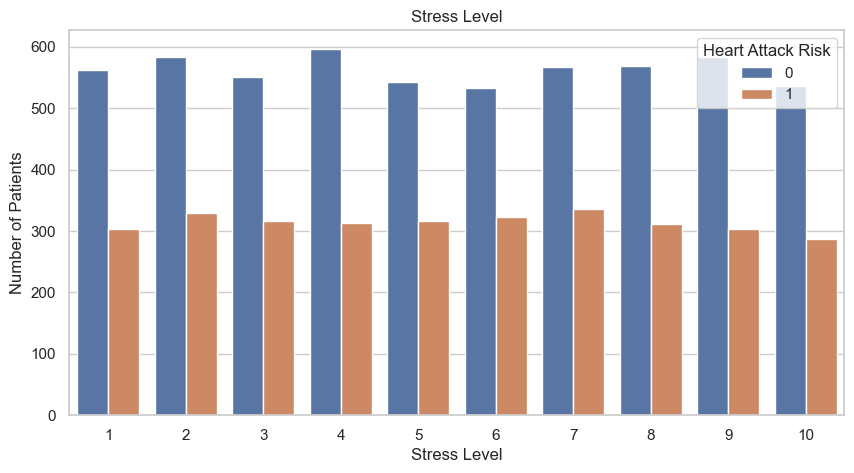

In [271]:
plt.figure(figsize=(10,5))
sns.countplot(data=encoded_data, x='Stress Level', hue='Heart Attack Risk')
plt.title('Stress Level',fontsize=12)
plt.ylabel('Number of Patients')
plt.xlabel('Stress Level')

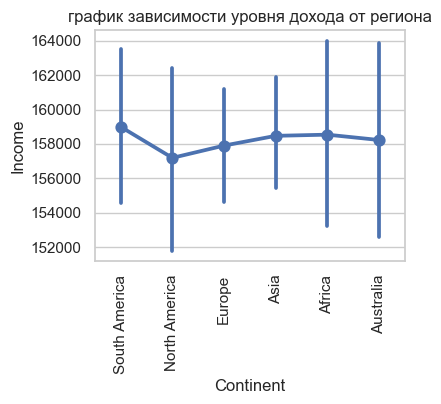

In [272]:
plt.figure(figsize=(4,3))
sns.pointplot(data = df, x="Continent", y="Income")
plt.title('график зависимости уровня дохода от региона')
plt.xticks(rotation=90)
plt.show()

In [273]:
encoded_data.columns

Index(['Age', 'Sex', 'Cholesterol', 'Systolic', 'Diastolic', 'BP_Ratio',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [274]:
age_mean = df['Age'].mean()
print(f'Среднее по Age :{age_mean}\n')

chol_mean = df['Cholesterol'].mean()
print(f'Среднее по Age :{chol_mean}\n')

income_mean = df['Income'].mean()
print(f'Среднее по Age :{income_mean}\n')


Среднее по Age :53.70797672030127

Среднее по Age :259.8772110007988

Среднее по Age :158263.18190117538



In [275]:
age_std = np.std(df['Age'])
print(f'Среднеквадратичное отклонение по Age :{age_std}\n')

chol_std = np.std(df['Cholesterol'])
print(f'Среднеквадратичное отклонение по Cholesterol :{chol_std}\n')

income_std = np.std(df['Income'])
print(f'Среднеквадратичное отклонение по Income :{income_std}\n')

Среднеквадратичное отклонение по Age :21.24829631134157

Среднеквадратичное отклонение по Cholesterol :80.85866206944085

Среднеквадратичное отклонение по Income :80570.59320833185



In [276]:
age_mode = df['Age'].mode()
print(f'Мода по Age :{age_mode}\n')

chol_mode = df['Cholesterol'].mode()
print(f'Мода по Cholesterol :{chol_mode}\n')

income_mode = df['Income'].mode()
print(f'Мода по Income :{income_mode}\n')

Мода по Age :0    90
Name: Age, dtype: int64

Мода по Cholesterol :0    235
Name: Cholesterol, dtype: int64

Мода по Income :0    225278
Name: Income, dtype: int64



In [278]:
# Начинаем обучение. 


In [464]:
X = encoded_data.iloc[:,1:-1].values 
y = encoded_data.iloc[:,-1].values

In [465]:
X.shape

(8763, 25)

In [466]:
y.shape

(8763,)

In [467]:
X

array([[  1., 208., 158., ...,   0.,   5.,   1.],
       [  1., 389., 165., ...,   3.,   4.,   0.],
       [  0., 324., 174., ...,   6.,   3.,   0.],
       ...,
       [  1., 250., 161., ...,   2.,   5.,   1.],
       [  1., 178., 119., ...,   2.,   5.,   1.],
       [  0., 356., 138., ...,  17.,   3.,   0.]], shape=(8763, 25))

In [468]:
XX = encoded_data.loc[:, df.nunique() > 10].columns
yy = encoded_data['Heart Attack Risk']

In [378]:
yy.value_counts(normalize=True) * 100

Heart Attack Risk
0    64.178934
1    35.821066
Name: proportion, dtype: float64

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 1)

In [380]:
math.sqrt(len(y_test))

41.86884283091664

In [381]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [382]:
# SVM

In [384]:
svm = SVC(kernel= 'rbf', random_state = 0)
svm.fit(X_train, y_train)
pred = svm.predict(X_test)
print(metrics.accuracy_score(y_test, pred)*100)
print(metrics.f1_score(y_test, pred)*100)
print(metrics.precision_score(y_test, pred)*100)
print(metrics.recall_score(y_test, pred)*100)

65.20250998288648
0.32679738562091504
100.0
0.16366612111292964


In [385]:
 # KNN

In [386]:
knn = KNeighborsClassifier(n_neighbors= 1000)
knn.fit(X_train, y_train)
pred1 = knn.predict(X_test)
print(metrics.accuracy_score(y_test, pred1)*100)
print(metrics.f1_score(y_test, pred1)*100)
#print(metrics.precision_score(y_test, pred1)*100)
print(metrics.recall_score(y_test, pred1)*100)

65.14546491728466
0.0
0.0


In [387]:
knn1 = KNeighborsClassifier(n_neighbors=42)
knn1.fit(X_train, y_train)
pred2 = knn1.predict(X_test)
print(metrics.accuracy_score(y_test, pred2)*100)
print(metrics.f1_score(y_test, pred2)*100)
print(metrics.precision_score(y_test, pred2)*100)
print(metrics.recall_score(y_test, pred2)*100)

64.68910439247006
2.211690363349131
31.818181818181817
1.1456628477905073


In [388]:
# Линейная регрессия

In [389]:
lr = LogisticRegression(C=1000, max_iter=10000)
lr.fit(X_train, y_train)
pred3 = lr.predict(X_test)
print(metrics.accuracy_score(y_test, pred3)*100)
print(metrics.f1_score(y_test, pred3)*100)
#print(metrics.precision_score(y_test, pred3)*100)
print(metrics.recall_score(y_test, pred3)*100)

65.14546491728466
0.0
0.0


In [390]:
# Гаусс

In [391]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred4 = gnb.predict(X_test)
print(metrics.accuracy_score(y_test, pred4)*100)
print(metrics.f1_score(y_test, pred4)*100)
print(metrics.precision_score(y_test, pred4)*100)
print(metrics.recall_score(y_test, pred4)*100)

65.08841985168283
0.32573289902280134
33.33333333333333
0.16366612111292964


In [392]:
# Дерево принятия решений

In [393]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train , y_train)
dtc_score1 = dtc.fit(X_train, y_train)
pred5 = dtc.predict(X_test)
print(metrics.accuracy_score(y_test, pred5)*100)
print(metrics.f1_score(y_test, pred5)*100)
print(metrics.precision_score(y_test, pred5)*100)
print(metrics.recall_score(y_test, pred5)*100)


55.79007415858528
37.24696356275304
36.858974358974365
37.64320785597381


In [394]:
# Метод случайного леса

In [395]:
rfc = RandomForestClassifier()
rfc.fit(X_train , y_train)
pred6 = rfc.predict(X_test)
print(metrics.accuracy_score(y_test, pred6)*100)
print(metrics.f1_score(y_test, pred6)*100)
print(metrics.precision_score(y_test, pred6)*100)
print(metrics.recall_score(y_test, pred6)*100)

63.37706788362807
3.313253012048193
20.754716981132077
1.800327332242226
